In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("fedex.csv")

In [8]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [9]:
df.shape

(3604175, 15)

In [10]:
df.dtypes

Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
Actual_Shipment_Time     float64
Planned_Shipment_Time      int64
Planned_Delivery_Time      int64
Carrier_Name              object
Carrier_Num                int64
Planned_TimeofTravel     float64
Shipment_Delay           float64
Source                    object
Destination               object
Distance                   int64
Delivery_Status          float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [12]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,3604175.0,3.604175e+06,3.604175e+06,3.604175e+06,3.522573e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.603628e+06,3.522573e+06,3.604175e+06,3.522573e+06
mean,2008.0,3.514942e+00,1.568481e+01,3.934604e+00,1.338455e+03,1.329371e+03,1.495305e+03,2.223795e+03,1.291603e+02,1.115893e+01,7.280915e+02,2.038890e-01
std,0.0,1.709912e+00,8.763332e+00,1.987126e+00,4.814053e+02,4.664365e+02,4.854825e+02,1.944583e+03,6.951011e+01,3.618888e+01,5.611318e+02,4.028875e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.500000e+01,-9.200000e+01,1.100000e+01,0.000000e+00
25%,2008.0,2.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.115000e+03,6.160000e+02,8.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00
50%,2008.0,4.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.321000e+03,1.519000e+03,1.573000e+03,1.110000e+02,-1.000000e+00,5.830000e+02,0.000000e+00
75%,2008.0,5.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.910000e+03,3.602000e+03,1.600000e+02,1.000000e+01,9.570000e+02,0.000000e+00
max,2008.0,6.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,9.741000e+03,1.435000e+03,2.467000e+03,4.962000e+03,1.000000e+00


In [15]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored('Number of Duplicate values: ','red',attrs=['bold']), duplicate_values)

Number of Duplicate values:  4


In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [17]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Actual_Shipment_Time     81602
Shipment_Delay           81602
Delivery_Status          81602
Planned_TimeofTravel       547
Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Source                       0
Destination                  0
Distance                     0
dtype: int64


In [18]:
df.dropna(inplace=True)

In [19]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Year                        1
Month                       6
DayofMonth                 31
DayOfWeek                   7
Actual_Shipment_Time     1439
Planned_Shipment_Time    1187
Planned_Delivery_Time    1350
Carrier_Name               20
Carrier_Num              7338
Planned_TimeofTravel      498
Shipment_Delay            997
Source                    297
Destination               299
Distance                 1420
Delivery_Status             2
dtype: int64


In [20]:
df.reset_index(inplace=True)
df.head(10)

,index,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
5,5,2008,1,3,4,1940.0,1915,2110,WN,378,115.0,25.0,IND,JAX,688,1.0
6,6,2008,1,3,4,1937.0,1830,1940,WN,509,250.0,67.0,IND,LAS,1591,1.0
7,7,2008,1,3,4,1039.0,1040,1150,WN,535,250.0,-1.0,IND,LAS,1591,0.0
8,8,2008,1,3,4,617.0,615,650,WN,11,95.0,2.0,IND,MCI,451,0.0
9,9,2008,1,3,4,1620.0,1620,1655,WN,810,95.0,0.0,IND,MCI,451,0.0


In [21]:
df.drop(['Year','index'],axis=1,inplace=True)
df.head(5)

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [22]:
df[['Planned_TimeofTravel','Shipment_Delay','Distance']].mean()

Planned_TimeofTravel    129.505781
Shipment_Delay           11.158186
Distance                731.615036
dtype: float64

In [24]:
df.median(numeric_only=True)

Month                       4.0
DayofMonth                 16.0
DayOfWeek                   4.0
Actual_Shipment_Time     1329.0
Planned_Shipment_Time    1320.0
Planned_Delivery_Time    1517.0
Carrier_Num              1562.0
Planned_TimeofTravel      111.0
Shipment_Delay             -1.0
Distance                  585.0
Delivery_Status             0.0
dtype: float64

In [25]:
df.mode()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,5,20,4,555.0,600,1930,WN,16,75.0,0.0,ATL,ATL,337,0.0


In [27]:
df.var(numeric_only=True)

Month                    2.921870e+00
DayofMonth               7.673194e+01
DayOfWeek                3.953407e+00
Actual_Shipment_Time     2.317488e+05
Planned_Shipment_Time    2.177398e+05
Planned_Delivery_Time    2.358514e+05
Carrier_Num              3.751298e+06
Planned_TimeofTravel     4.864158e+03
Shipment_Delay           1.309622e+03
Distance                 3.170118e+05
Delivery_Status          1.623119e-01
dtype: float64

In [29]:
df.std(numeric_only=True)

Month                       1.709348
DayofMonth                  8.759677
DayOfWeek                   1.988318
Actual_Shipment_Time      481.402973
Planned_Shipment_Time     466.625981
Planned_Delivery_Time     485.645393
Carrier_Num              1936.826751
Planned_TimeofTravel       69.743514
Shipment_Delay             36.188693
Distance                  563.037978
Delivery_Status             0.402879
dtype: float64

In [31]:
df.skew(numeric_only=True)

Month                   -0.028982
DayofMonth               0.000623
DayOfWeek                0.045562
Actual_Shipment_Time     0.043858
Planned_Shipment_Time    0.086629
Planned_Delivery_Time   -0.204917
Carrier_Num              0.906269
Planned_TimeofTravel     1.493550
Shipment_Delay           6.257128
Distance                 1.622148
Delivery_Status          1.470028
dtype: float64

In [33]:
df.kurt(numeric_only=True)

Month                    -1.263104
DayofMonth               -1.192774
DayOfWeek                -1.215264
Actual_Shipment_Time     -0.985367
Planned_Shipment_Time    -1.045884
Planned_Delivery_Time    -0.602298
Carrier_Num              -0.217094
Planned_TimeofTravel      2.735711
Shipment_Delay           96.077752
Distance                  3.273434
Delivery_Status           0.160982
dtype: float64

C:\Users\Anirban Mitra\AppData\Local\Temp\ipykernel_13992\1285565701.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


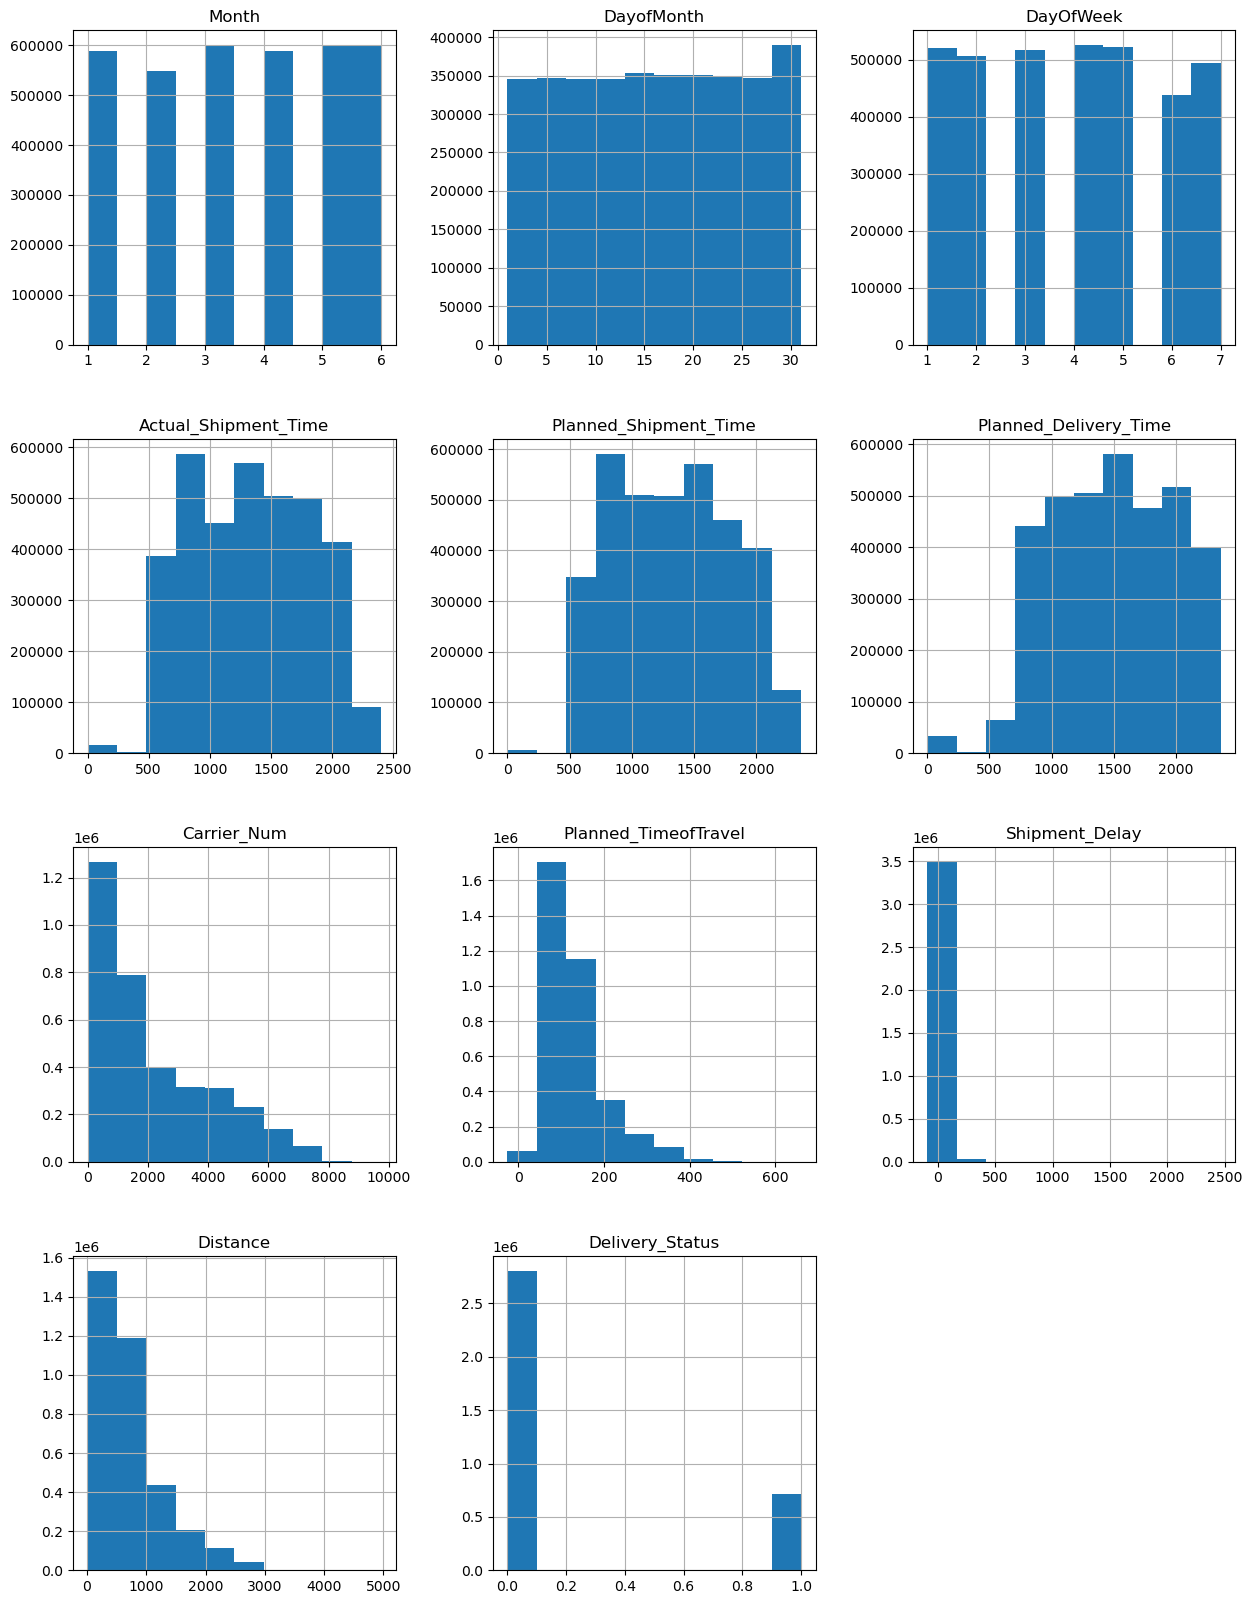

In [34]:
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
df.hist(ax=ax)
plt.show()

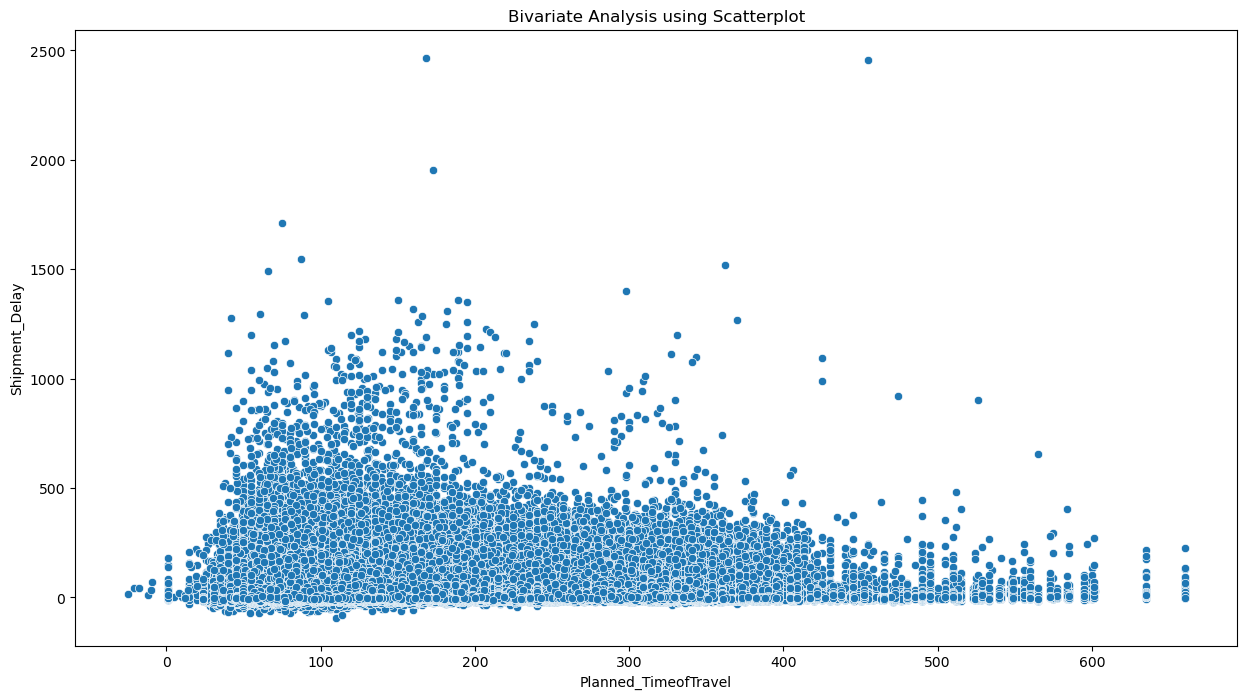

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Planned_TimeofTravel'],y=df['Shipment_Delay'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

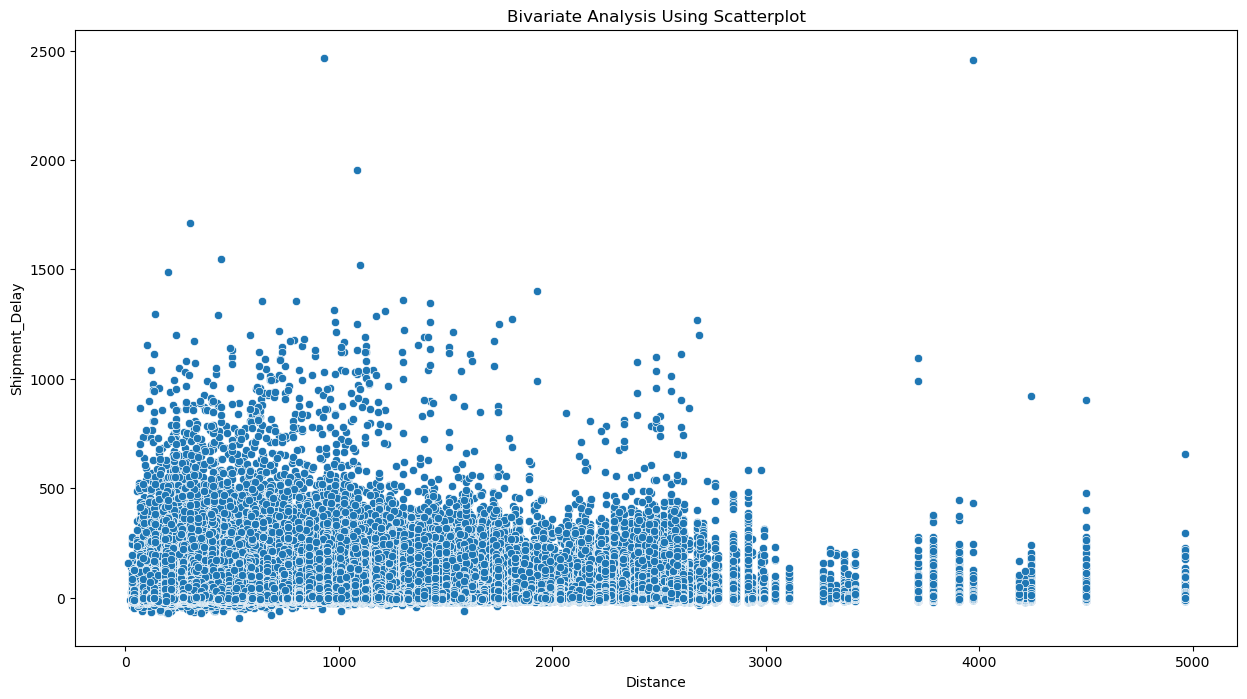

In [40]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Distance'],y=df['Shipment_Delay'])
plt.title("Bivariate Analysis Using Scatterplot")
plt.show()

<Axes: ylabel='Planned_TimeofTravel'>

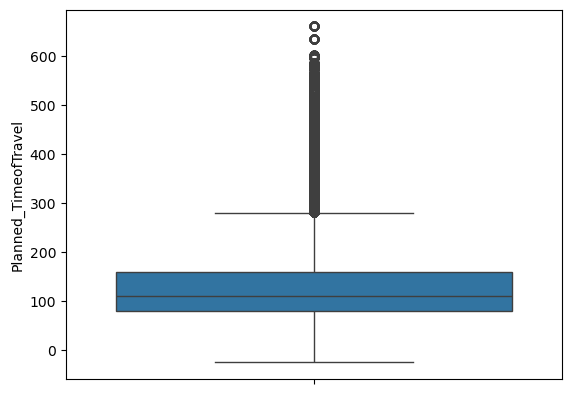

In [41]:
sns.boxplot(df['Planned_TimeofTravel'])

<Axes: ylabel='Shipment_Delay'>

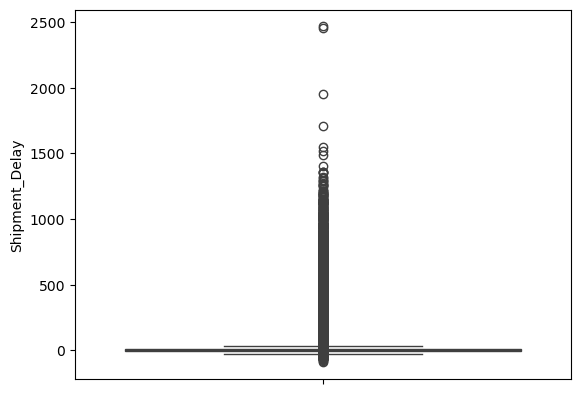

In [42]:
sns.boxplot(df['Shipment_Delay'])

<Axes: ylabel='Distance'>

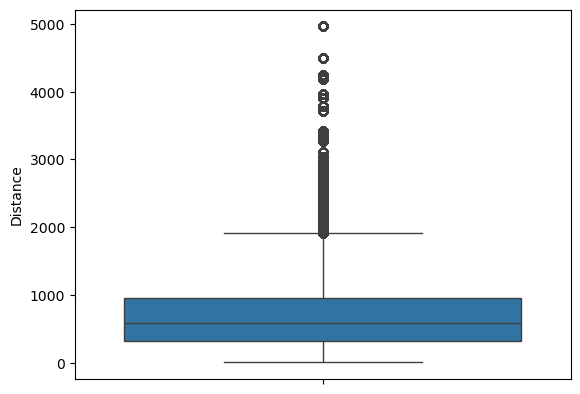

In [43]:
sns.boxplot(df['Distance'])